In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [2]:
#Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)

iris = datasets.load_iris()

print(iris.feature_names)

print(iris.data[:10])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [3]:
print(iris.target_names)
print(iris.target)

['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [4]:
iris_df = pd.DataFrame(iris.data)

iris_df.columns = iris.feature_names

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
#Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety

iris_df.drop(columns = ['petal length (cm)', 'petal width (cm)'], 
                axis = 1, inplace=True)

iris_df['variety'] = iris.target

In [6]:
iris_df.head()

data_class = iris_df.variety

iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   variety            150 non-null    int32  
dtypes: float64(2), int32(1)
memory usage: 3.1 KB


In [7]:
#Разделите данные на выборку для обучения и тестирования

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(iris_df, data_class, test_size = 0.25)

In [8]:
len(y_test)

38

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [10]:
#Постройте модель LDA

lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)

LinearDiscriminantAnalysis()

In [11]:
lda.predict(x_test)

array([0, 0, 1, 1, 2, 1, 1, 2, 2, 0, 2, 1, 1, 0, 2, 1, 1, 2, 2, 2, 0, 1,
       0, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 0, 2, 0, 0])

In [12]:
from sklearn.metrics import accuracy_score

In [13]:
accuracy_score(y_test, lda.predict(x_test)) #точность модели всегда разная

0.7105263157894737

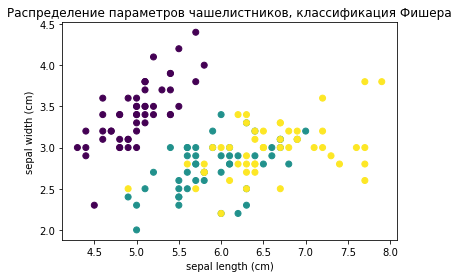

In [14]:
plt.scatter(iris_df['sepal length (cm)'], iris_df['sepal width (cm)'], c = iris_df['variety'])

plt.title('Распределение параметров чашелистников, классификация Фишера')
plt.ylabel('sepal width (cm)')
plt.xlabel('sepal length (cm)')

plt.show()

In [15]:
iris_df_test = x_test
iris_df_test.info()

sy_test = y_test

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 19 to 33
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  38 non-null     float64
 1   sepal width (cm)   38 non-null     float64
 2   variety            38 non-null     int32  
dtypes: float64(2), int32(1)
memory usage: 1.0 KB


In [16]:
lda.means_

array([[4.99268293, 3.39756098, 0.        ],
       [5.85675676, 2.73513514, 1.        ],
       [6.64117647, 3.        , 2.        ]])

ValueError: X has 2 features per sample; expecting 3

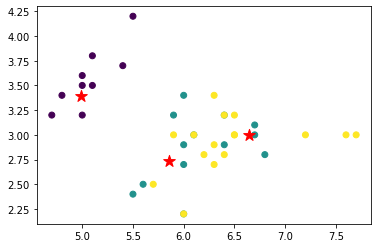

In [17]:
#Визуализируйте предсказания для тестовой выборки и центры классов

plt.scatter(iris_df_test['sepal length (cm)'], iris_df_test['sepal width (cm)'], c = sy_test)
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c = 'r', s = 150, marker = '*' )

nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()

xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                    np.linspace(y_min, y_max, ny))

k = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()]) #ПОМОГИТЕ, пожалуйста
k = k[:, 1].reshape(xx.shape)

plt.title('Распределение параметров чашелистников, классификация модели LDA')
plt.ylabel('sepal width (cm)')
plt.xlabel('sepal length (cm)')

plt.show()

#Как и на графике выше видим, что при прогнозировании остаётся не ярко выраженное деление между 1 и 2 классами.
#При этом, о принадлежности цветка к 0 классу можно сделать более однозначный прогноз.

In [18]:
#Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width

iris_df_1 = pd.DataFrame(data=iris_df, columns=['sepal length (cm)', 'sepal width (cm)'])
iris_df_1.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [21]:
from sklearn.cluster import KMeans

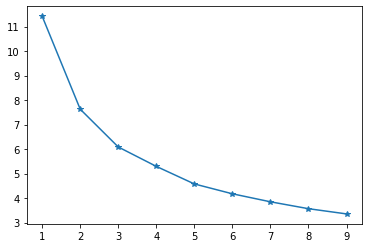

In [41]:
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(iris_df_1)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(1, 10), inertia, marker='*')

#График локтя показывает, что оптимально использовать 3 кластера.

In [50]:
kmeans = KMeans(n_clusters = 3)

klass = kmeans.fit_predict(iris_df_1)
klass

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0])

Text(0.5, 0, 'sepal length (cm)')

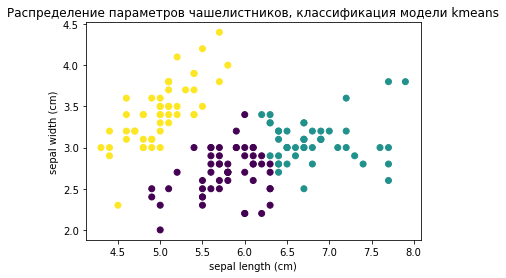

In [52]:
plt.scatter(iris_df_1['sepal length (cm)'], iris_df_1['sepal width (cm)'], c = klass)

plt.title('Распределение параметров чашелистников, классификация модели kmeans')
plt.ylabel('sepal width (cm)')
plt.xlabel('sepal length (cm)')

In [53]:
'''
По сравнению с первоначальной классификацией Фишера, такое распределение визуально понятнее.
Кластеры 1 и 2 однозначно поделены - это упрощает их восприятние.

'''

'\nПо сравнению с первоначальной классификацией Фишера, такое распределение визуально понятнее.\nКластеры 1 и 2 однозначно поделены - это упрощает их восприятние.\n\n'